1. Importing OpenCV library, suitable for Computer vision tasks such as Object Detection, Image Captioning, Image Classification, Object Localization.

2. Importing NumPy library for performing numerical computations in Python - Large and Multi-Dimensional arrays and Matrices. Also provides some functions to perform operations in arrays and Matrices.

3. Importing Matplotlib library from Pyplot module to create static, animated and interactive visualizations in Python.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. dnn = Deep Neural Networks module in OpenCV.
2. readNet = To read the Deep Neural Network model stored in the file.
3. Loads the pre-trained weights and the Configuration(containing the architecture details of the model) into the yolo object, which is then ready to perform object detection tasks.  

In [ ]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

1. Intializing the empty list

2. Opening the file named "coco.names" in read mode.

3. "With" - Ensures the file is closed properly after use even if the exception occurs during the file read.

4. Reads the entire file and "splitlines" method puts each class/object in one line. So that the "classes" list now contains the list of names.

In [ ]:
classes = []
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

Finding the Length of the "classes" list

In [ ]:
len(classes)

80

Reading an image and loading it img variable.

Creating 4-dimensional blob formatted image from the Original input image. The parameters passed are: Image, Scaling factor (1/255) to put all the pixels of the image into the range of [0,1].
Then, all images in the Deep learning should have fixed size, Then the mean subtraction value, here in this case, we are taking (0,0,0).

**Purpose :** To reduce the lighting variations and the color distributions in images.

The values of the 3 channels are observed across all the images in the image dataset and that's how the mean subtraction value will be derived.

No cropping is done and Swapping the channels - BGR to RGB

In [ ]:
img = cv2.imread("./Image5.jpg")
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320),(0,0,0), swapRB=True, crop=False)

Batch size = Here, only 1 image is processed.

Number of channels - RGB

Dimensions of the blob = (320,320)

In [ ]:
blob.shape

(1, 3, 320, 320)

Takes the first image in the batch and reshaping.

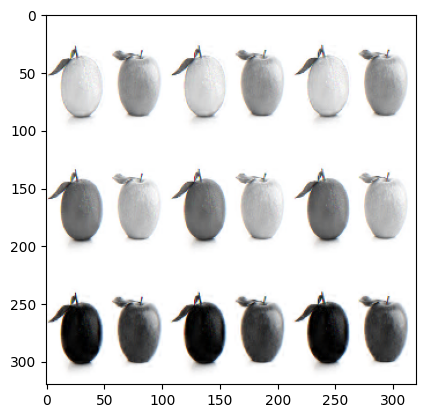

In [ ]:
image = blob[0].reshape(320,320,3)
plt.imshow(image)

In [ ]:
yolo.setInput(blob)

Here "yolo" object contains the yolo model which is loaded using the cv2.dnn.readNet() function.

getUnconnectedOutLayersNames = This function retrieves the names of the output layers that are not connected by any other layer. This  is the final detections or predictions that are made by the yolo model.

1. So, the output_layer_name variable will contain the names of the output layers obtained by using the getUnconnectedOutLayersNames().

2. Then forward() is used to forward pass the input(names of the output layers) through the neural network and the neural network (several layers) processess and computes the input image and returns the activations(output) at these output layers...

3. The output will be something like bounding boxes, coordinates, class labels and the confidence scores.

**In summary, layeroutput will contain the predictions (detections) made by the YOLO model after processing the input image. The getUnconnectedOutLayersNames() function is used to obtain the names of the output layers Eg: Output1, Output2, Output3 - Which are assigned during the creation of the yolo model architecture , and then forward() is called to compute the output of the model at those layers.**

In [ ]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [ ]:
width = 320
height = 320
boxes = []
confidences = []
class_ids = []
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_x = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x- w/2)
      y = int(center_x- h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [ ]:
len(boxes)

1

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences ,0.5,0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes),3))

In [ ]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confidence_value = str(round(confidences[i],2))
  color = colors[i]

  cv2.rectangle(img,(x,y),(x+w,y+h), color, 2)
  cv2.putText(img, label +" "+confidence_value, (x,y+20), font, 2,(0,0,0), 2)

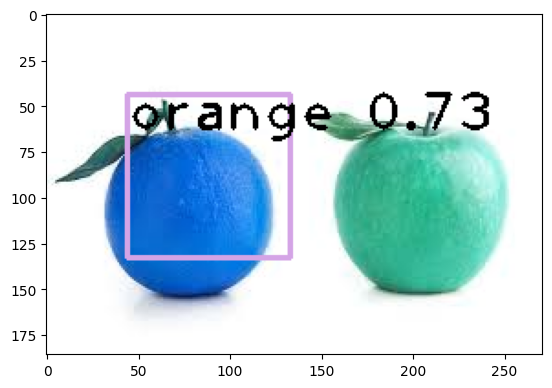

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite("./Image5.jpg", img)

True